#  Exercise 7: MFKZIZ004

The code that has been used here has been taken from the  NP_to_NPD.ipynb notebook and modified to answer the questions. 

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [6]:
# function that returns the right hand side of the above equations
def model(state,t,k):
    N,P = state # this is the first input
    Ndot = -k * N * P
    Pdot =  k * N * P
    return np.array([Ndot,Pdot])

In [8]:
# initial conditions
K = 0.1
N0 = 5.
P0 = 0.1
state0 = np.array([N0,P0])

# time points (days)
t = np.linspace(0,20,num=100)

# solve ODE using odeint (remember that args is a tuple)
y = odeint(model,state0,t,args=(K,))

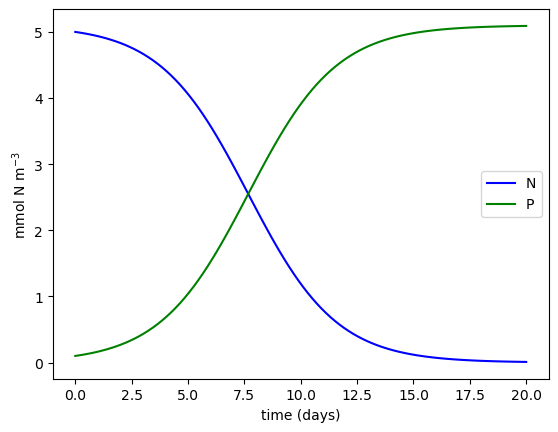

In [10]:
# plot the resulting time series
plt.plot(t,y[:,0],'b',label='N')
plt.plot(t,y[:,1],'g',label='P')
plt.xlabel('time (days)')
plt.ylabel('mmol N m$^{-3}$')
plt.legend()
plt.show()

#### (1) What are the inputs and outputs in the function model? What kind of objects are they?
- The function model is based on looking at the interaction between nutrients (N) and phytoplankton (P) and this ODE is solved by using the odeint() function.
- The function model has three inputs: the first input is state and this has an array of the N and P values. The second input is t, this is the time for the N/P changes over time within the system. The third input is K, this is an  uptake parameter (its the constant), this tells us about how relationship between N or P changes as the parameter intensity changes.
- Additionally, the equation has  Ndot = -k * N * P and Pdot =  k * N * P which tells us that Nutrients decrease based on N and over time, whereas Phytoplankton increase.
  

#### (2)  Write the equtions for a new model to simulate the nutrient-phytoplankton-detritus system (NPD). You will Include a detritus variable D that is produced from the mortality of phytoplankton and it is remineralized as a nutrient. You will need 2 additional parameters: the mortality rate (phytoplankton lysis) and the remineralization rate

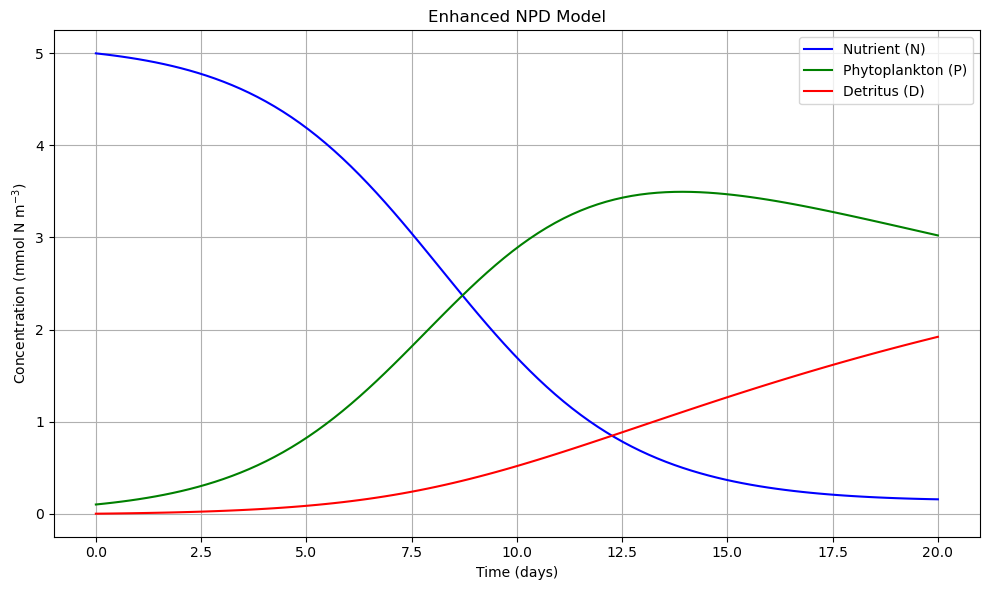

In [18]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Function defining the NPD model
def model(state, t, k, m, r):
    N, P, D = state  # Nutrient, Phytoplankton, Detritus

    # Differential equations
    Ndot = -k * N * P + r * D      # Nutrient loss to phytoplankton, gain from detritus remineralization
    Pdot =  k * N * P - m * P      # Phytoplankton growth and mortality
    Ddot =  m * P - r * D          # Detritus from dead phytoplankton, lost through remineralization

    return [Ndot, Pdot, Ddot]

# Parameters
k = 0.1   # Nutrient uptake rate
m = 0.05  # Phytoplankton mortality rate
r = 0.02  # Detritus remineralization rate

# Initial conditions
N0 = 5.0   # Initial nutrient concentration
P0 = 0.1   # Initial phytoplankton concentration
D0 = 0.0   # Initial detritus concentration
state0 = [N0, P0, D0]

# Time points (days)
t = np.linspace(0, 20, num=100)

# Solve the ODE
solution = odeint(model, state0, t, args=(k, m, r))
N, P, D = solution.T  # Transpose to separate each variable

# Plot the time series
plt.figure(figsize=(10,6))
plt.plot(t, N, 'b-', label='Nutrient (N)')
plt.plot(t, P, 'g-', label='Phytoplankton (P)')
plt.plot(t, D, 'r-', label='Detritus (D)')
plt.xlabel('Time (days)')
plt.ylabel('Concentration (mmol N m$^{-3}$)')
plt.title('Enhanced NPD Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

From the above plot, nutrient concentration are high and at about day 8 they start to decrease. The decrease concides with a increase in phytoplankton, they make use of nutrients for proccesses such as photosynthesis. At day 20, phytoplankton starts to decrease and detritius increases.This is due to reminilization also taking place as the detrius takes organic matter (dead phytoplankton organic matter) and make it inorganic. This proccess also takes nutrients from the water. 

#### (3) Write the code to solve the new model using odeint and propose some reasonable values for the parameters that lead to a realistic solution

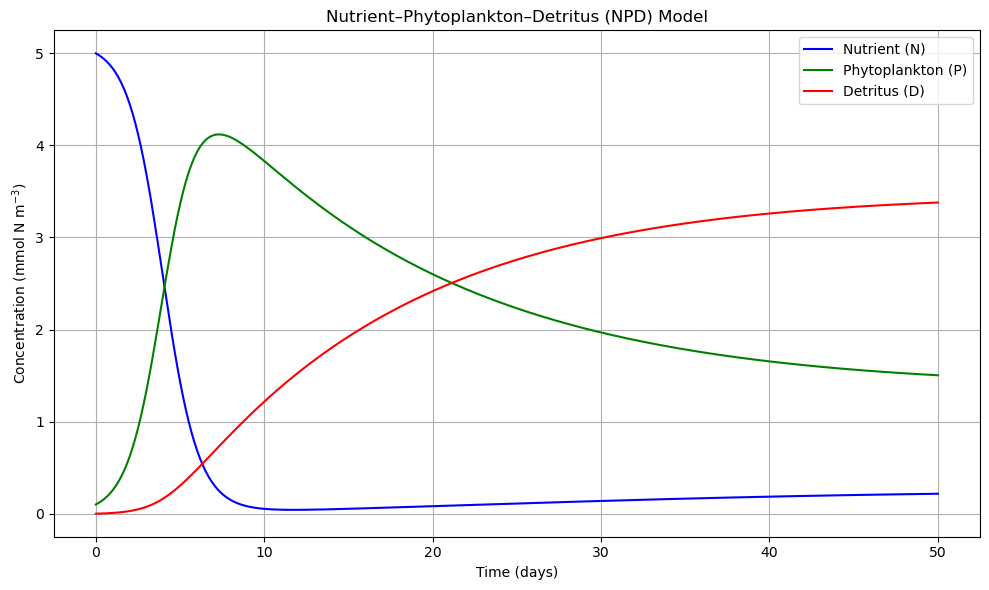

In [21]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the NPD model
def npd_model(state, t, k, m, r):
    N, P, D = state
    dNdt = -k * N * P + r * D
    dPdt =  k * N * P - m * P
    dDdt =  m * P - r * D
    return [dNdt, dPdt, dDdt]

# Parameter values (reasonable)
k = 0.2   # Nutrient uptake rate
m = 0.05  # Phytoplankton mortality rate
r = 0.02  # Detritus remineralization rate

# Initial conditions: N0, P0, D0 (in mmol N m^-3)
state0 = [5.0, 0.1, 0.0]

# Time span (0 to 50 days)
t = np.linspace(0, 50, 300)

# Solve the ODE system
solution = odeint(npd_model, state0, t, args=(k, m, r))
N, P, D = solution.T

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(t, N, 'b-', label='Nutrient (N)')
plt.plot(t, P, 'g-', label='Phytoplankton (P)')
plt.plot(t, D, 'r-', label='Detritus (D)')
plt.xlabel('Time (days)')
plt.ylabel('Concentration (mmol N m$^{-3}$)')
plt.title('Nutrient–Phytoplankton–Detritus (NPD) Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

From the above plot its seen that the nutrient concentrations start off very high and overtime they start to decrease and this may be due to the phytoplankton that consumes it. Its seen that the phytoplankton started off very small and over time it icreased. However, its also seen that the phytoplankton starts levelling off, this may indicate their death. This increases the detritius and it increases as the phytoplankton decreases. 